# Исследование объявлений о продаже квартир

Определение рыночной стоимости объектов недвижимости. Главная задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('real_estate_data_1.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

Изучив данные визуально, сразу в глаза бросаются NaN в колонках: 1. ceiling_heidht (видимо не так много людей измерили высоту потолков и внесли ее, можно будет медианой заполнить пропуски), 2. living_area (также не заполнено пользователями сервиса, можно будет посмотреть соотношение всей площади к жилой площади и взять среднее, дальше заполнить пропуски расчитывая отношение ко всей площади), 3. is_apartment (тут скорее всего незаполнено у тех, кто владеет квартирами, а не студиями, т.е. будем менять пропуски на True, а заполненные оставлять False), 4. kitchen_area (предполагаю, что площадь кухни не заполнили владельцы студий, поступлю также, как и с отношением жилой и общей площади), 5. balcony (оставлять пустое поле или менять на ноль), 6. locality_name (можно будет посмотреть по удаленности от центра и если это в границах площади Санкт-Петербурга, то пропуски заменить на "Санкт-Петербург", все остальное "Ленинградская область") 7. Пропуски в расстояних до какой-либо точки надо будет изучать глубже, чтобы понимать в чем проблема, может ошибается алгоритм, может не задан адрес квартиры и поэтому оно не рассчитывается. 8. days_exposition (скорее всего NaN там, где квартира еще не продана, можно будет заполнить пропусками).

## Предобработка данных

In [5]:
df_notnan_ch = df.query('ceiling_height != "NaN"')
df_ch_median = df_notnan_ch['ceiling_height'].median()
df_ch_median

2.65

In [6]:
df['ceiling_height'] = df['ceiling_height'].fillna(df_ch_median)
df.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
#пропуски из колонки ceiling_height убраны
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
#пропущенные значения в floors_total меньше одного процента, можно их просто удалить
part_nan_floors_total = 86 / len(df) * 100
part_nan_floors_total

0.36288450989493226

In [9]:
df = df.dropna(subset=['floors_total'])
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

In [10]:
df_notnan_la = df.query('living_area != "NaN"')
df_part_la = df['living_area'] / df['total_area']
df_part_la.median()

0.5681818181818182

In [11]:
df['rooms'].value_counts()

1     8015
2     7913
3     5795
4     1177
5      325
0      194
6      104
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [12]:
df['part_living_total_area'] = df['living_area'] / df['total_area']
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'part_living_total_area'],
      dtype='object')

In [13]:
df_rm = df.pivot_table(index='rooms', values='part_living_total_area', aggfunc='median')
df_rm

,part_living_total_area
rooms,
0,0.689655
1,0.482638
2,0.585366
3,0.631833
4,0.659740
5,0.651842
6,0.679509
7,0.681670
8,0.688475


In [14]:
df1 = df.merge(df_rm, on = 'rooms')
df1.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,part_living_total_area_x,part_living_total_area_y
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.631833
1,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,0.631833
2,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,0.714754,0.631833
3,11,6700000.0,82.0,2017-11-23T00:00:00,3,3.05,5.0,55.6,1,NaN,...,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,0.678049,0.631833
4,16,14200000.0,121.0,2019-01-09T00:00:00,3,2.75,16.0,76.0,8,NaN,...,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0,0.628099,0.631833


In [15]:
df1.loc[
    
    df1['living_area'].isnull(), 'living_area'

] = df1.loc[
    
    df1['living_area'].isnull(), 'total_area'
    
] * df1.loc[
    
    df1['living_area'].isnull(), 'part_living_total_area_y'
           
]

df1.isnull().sum()

total_images                    0
last_price                      0
total_area                      0
first_day_exposition            0
rooms                           0
ceiling_height                  0
floors_total                    0
living_area                     0
floor                           0
is_apartment                20838
studio                          0
open_plan                       0
kitchen_area                 2231
balcony                     11480
locality_name                  48
airports_nearest             5532
cityCenters_nearest          5509
parks_around3000             5508
parks_nearest               15568
ponds_around3000             5508
ponds_nearest               14552
days_exposition              3172
part_living_total_area_x     1870
part_living_total_area_y        0
dtype: int64

In [16]:
#удаляю столбцы, которые больше не нужны
df = df1.drop(['part_living_total_area_x', 'part_living_total_area_y'], axis = 1)
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

In [17]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

In [18]:
#посмотрел по срезу, есть ли какие-то подозрительные связи между пропусками в kitchen_area и другими колонками
df.query('kitchen_area == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,100.461415,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
22,3,4500000.0,80.5,2018-01-15T00:00:00,3,2.65,25.0,50.862540,16,False,...,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0
54,8,5300000.0,60.0,2016-05-19T00:00:00,3,2.65,9.0,37.909968,4,False,...,NaN,0.0,Санкт-Петербург,52072.0,17061.0,1.0,1133.0,3.0,239.0,372.0
59,13,2200000.0,47.0,2018-01-12T00:00:00,3,2.34,5.0,29.696141,1,False,...,NaN,NaN,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
70,5,23900000.0,108.4,2018-11-15T00:00:00,3,3.06,7.0,68.490675,6,False,...,NaN,NaN,Санкт-Петербург,26819.0,5026.0,1.0,657.0,1.0,678.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23564,12,13490000.0,100.6,2018-07-31T00:00:00,7,2.65,4.0,68.576030,2,True,...,NaN,NaN,Санкт-Петербург,24309.0,3876.0,3.0,574.0,3.0,325.0,50.0
23586,11,150000000.0,230.0,2017-10-25T00:00:00,8,2.65,8.0,220.000000,8,False,...,NaN,NaN,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,135.0
23589,4,24000000.0,316.3,2015-03-25T00:00:00,8,2.65,5.0,187.000000,5,False,...,NaN,0.0,Санкт-Петербург,24555.0,5129.0,0.0,NaN,1.0,934.0,542.0
23594,7,18000000.0,245.0,2017-04-06T00:00:00,8,3.54,5.0,155.000000,2,False,...,NaN,NaN,Санкт-Петербург,22215.0,2424.0,1.0,867.0,1.0,340.0,357.0


In [19]:
#можно сделать по аналогии, как заполнял пропуски в living_area.
#возьму отношение площади кухни к жилой площади, вычислю медиану сгруппировав по количеству комнат
#и обратным действием заполню пропуски
df['part_kitchen_area_la'] = df['kitchen_area'] / df['living_area']
df1 = df.pivot_table(index='rooms', values='part_kitchen_area_la', aggfunc='median')
df1


,part_kitchen_area_la
rooms,
1,0.523810
2,0.279707
3,0.204633
4,0.169910
5,0.162500
6,0.146095
7,0.123503
8,0.160494
9,0.078981


Можно сделать по аналогии, как заполнял пропуски в living_area. Возьму отношение площади кухни к жилой площади, вычислю медиану сгруппировав по количеству комнат и обратным действием заполню пропуски

In [20]:
df = df.merge(df1, on = 'rooms')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,part_kitchen_area_la_x,part_kitchen_area_la_y
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.490196,0.204633
1,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,100.461415,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,0.204633
2,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7,False,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,0.149083,0.204633
3,11,6700000.0,82.0,2017-11-23T00:00:00,3,3.05,5.0,55.600000,1,False,...,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,0.161871,0.204633
4,16,14200000.0,121.0,2019-01-09T00:00:00,3,2.75,16.0,76.000000,8,False,...,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0,0.157895,0.204633


In [21]:
df.loc[
    
    df['kitchen_area'].isnull(), 'kitchen_area'
    
] = df.loc[
    
    df['kitchen_area'].isnull(), 'living_area'

] * df.loc[
    
    df['kitchen_area'].isnull(), 'part_kitchen_area_la_y'

]

df.isnull().sum()

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                   0
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area                  0
balcony                   11412
locality_name                48
airports_nearest           5455
cityCenters_nearest        5432
parks_around3000           5431
parks_nearest             15402
ponds_around3000           5431
ponds_nearest             14426
days_exposition            3158
part_kitchen_area_la_x     2037
part_kitchen_area_la_y        0
dtype: int64

In [22]:
df = df.drop(['part_kitchen_area_la_x', 'part_kitchen_area_la_y'], axis = 1)
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11412
locality_name              48
airports_nearest         5455
cityCenters_nearest      5432
parks_around3000         5431
parks_nearest           15402
ponds_around3000         5431
ponds_nearest           14426
days_exposition          3158
dtype: int64

In [23]:
df.query('balcony == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
3,11,6700000.0,82.0,2017-11-23T00:00:00,3,3.05,5.0,55.6,1,False,...,9.0,NaN,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0
4,16,14200000.0,121.0,2019-01-09T00:00:00,3,2.75,16.0,76.0,8,False,...,12.0,NaN,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
11,7,45000000.0,161.0,2017-10-17T00:00:00,3,3.20,8.0,38.0,4,False,...,50.0,NaN,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0
13,2,20000000.0,118.0,2018-09-11T00:00:00,3,3.00,9.0,68.0,7,False,...,16.0,NaN,Санкт-Петербург,26055.0,4800.0,1.0,648.0,1.0,779.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23411,0,22250000.0,249.9,2019-04-23T00:00:00,9,3.20,5.0,157.0,5,False,...,12.4,NaN,Санкт-Петербург,10328.0,9987.0,2.0,352.0,0.0,NaN,NaN
23413,15,88000000.0,400.0,2019-03-27T00:00:00,9,2.50,2.0,250.0,1,False,...,50.0,NaN,Санкт-Петербург,24395.0,2725.0,2.0,315.0,1.0,578.0,NaN
23415,0,24000000.0,250.0,2019-04-23T00:00:00,9,3.20,5.0,160.6,3,False,...,11.7,NaN,Санкт-Петербург,10328.0,9987.0,2.0,352.0,0.0,NaN,NaN
23416,6,32250000.0,374.6,2018-06-09T00:00:00,19,2.65,5.0,264.5,2,False,...,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0


In [24]:
df['balcony'] = df['balcony'].fillna('0')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,100.461415,9,False,...,20.557741,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
2,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7,False,...,6.500000,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
3,11,6700000.0,82.0,2017-11-23T00:00:00,3,3.05,5.0,55.600000,1,False,...,9.000000,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0
4,16,14200000.0,121.0,2019-01-09T00:00:00,3,2.75,16.0,76.000000,8,False,...,12.000000,0,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
5,12,6120000.0,80.0,2017-09-28T00:00:00,3,2.70,27.0,48.000000,11,False,...,12.000000,2,посёлок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74.0
6,20,7100000.0,70.0,2017-05-12T00:00:00,3,2.60,17.0,49.000000,11,False,...,9.200000,0,Санкт-Петербург,29197.0,11456.0,2.0,452.0,1.0,779.0,151.0
7,9,8600000.0,100.0,2016-04-09T00:00:00,3,2.65,19.0,52.000000,15,False,...,11.000000,0,Санкт-Петербург,30394.0,11526.0,1.0,532.0,1.0,896.0,125.0
8,7,4990000.0,60.0,2016-05-22T00:00:00,3,2.65,5.0,39.000000,4,False,...,6.000000,0,Санкт-Петербург,11349.0,12889.0,0.0,NaN,1.0,426.0,224.0
9,16,7900000.0,74.0,2016-05-04T00:00:00,3,2.65,14.0,59.000000,8,False,...,12.000000,5,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0


In [25]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5455
cityCenters_nearest      5432
parks_around3000         5431
parks_nearest           15402
ponds_around3000         5431
ponds_nearest           14426
days_exposition          3158
dtype: int64

In [26]:
#всего 48 строк с пропусками по этой колонке, их удаление не повлияет на качество выборки

df = df.dropna(subset=['locality_name'])
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5447
cityCenters_nearest      5424
parks_around3000         5423
parks_nearest           15369
ponds_around3000         5423
ponds_nearest           14403
days_exposition          3157
dtype: int64

In [27]:
#locality_name это категориальная переменная, ее лучше перевести в нижний регистр

df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'].value_counts()

санкт-петербург                  15542
посёлок мурино                     494
посёлок шушары                     435
всеволожск                         392
пушкин                             369
                                 ...  
поселок коробицыно                   1
деревня меньково                     1
поселок красносельское               1
деревня иссад                        1
поселок пансионат зелёный бор        1
Name: locality_name, Length: 362, dtype: int64

In [28]:
df.query('airports_nearest == "NaN"').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10,17,3600000.0,56.1,2018-10-18T00:00:00,3,2.65,4.0,42.50,3,False,...,5.70,1,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
12,0,4800000.0,78.6,2017-09-17T00:00:00,3,2.80,9.0,48.80,5,False,...,11.90,2,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
15,11,4150000.0,74.0,2017-08-04T00:00:00,3,2.80,5.0,44.00,1,False,...,8.00,2,деревня фёдоровское,NaN,NaN,NaN,NaN,NaN,NaN,234.0
18,12,2800000.0,55.1,2016-05-14T00:00:00,3,2.60,5.0,38.40,1,False,...,4.90,0,кировск,NaN,NaN,NaN,NaN,NaN,NaN,606.0
20,12,2590000.0,55.7,2017-12-18T00:00:00,3,2.50,4.0,42.60,4,False,...,7.00,0,кировск,NaN,NaN,NaN,NaN,NaN,NaN,463.0
21,8,4050000.0,79.1,2018-02-23T00:00:00,3,3.00,15.0,45.23,1,False,...,11.95,1,деревня новое девяткино,NaN,NaN,NaN,NaN,NaN,NaN,235.0
23,9,2500000.0,63.0,2018-10-25T00:00:00,3,2.50,5.0,43.00,4,False,...,9.00,0,посёлок городского типа сиверский,NaN,NaN,NaN,NaN,NaN,NaN,45.0
35,8,3400000.0,71.1,2018-08-20T00:00:00,3,2.50,5.0,41.90,4,False,...,9.00,2,приозерск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,1,4620000.0,86.2,2017-09-27T00:00:00,3,2.75,12.0,49.60,9,False,...,17.00,1,деревня куттузи,NaN,NaN,NaN,NaN,NaN,NaN,42.0
42,9,2250000.0,73.0,2018-11-14T00:00:00,3,2.65,5.0,43.40,5,False,...,8.40,0,деревня заклинье,NaN,NaN,NaN,NaN,NaN,NaN,46.0


In [29]:
df_ln = df.query('airports_nearest != "NaN"').pivot_table(index='locality_name', values='airports_nearest', aggfunc='median')
df_ln.columns = ['airports_metrs']
df_ln

,airports_metrs
locality_name,
зеленогорск,72282.0
колпино,26232.0
красное село,25723.5
кронштадт,67850.0
ломоносов,48415.5
павловск,20529.5
петергоф,39231.0
поселок лисий нос,55930.0
посёлок александровская,12896.5


In [30]:
df = df.merge(df_ln, on = 'locality_name')
df.loc[df['airports_nearest'].isnull(), 'airports_nearest'] = df.loc[df['airports_nearest'].isnull(), 'airports_metrs']
df = df.drop(['airports_metrs'], axis = 1)
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest        68
parks_around3000           67
parks_nearest           10013
ponds_around3000           67
ponds_nearest            9047
days_exposition          2336
dtype: int64

In [31]:
df_ln2 = df.query('parks_nearest != "NaN"').pivot_table(index='locality_name', values='parks_nearest', aggfunc='median')
df_ln2.columns = ['parks_metrs']
df_ln2


,parks_metrs
locality_name,
зеленогорск,147.5
колпино,393.0
красное село,435.0
кронштадт,293.0
ломоносов,407.0
павловск,312.0
петергоф,294.0
посёлок парголово,733.0
посёлок стрельна,700.0


In [32]:
df = df.merge(df_ln2, on = 'locality_name')
df.loc[df['parks_nearest'].isnull(), 'parks_nearest'] = df.loc[df['parks_nearest'].isnull(), 'parks_metrs']
df = df.drop(['parks_metrs'], axis = 1)
df.isnull().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest       66
parks_around3000          65
parks_nearest              0
ponds_around3000          65
ponds_nearest           8665
days_exposition         2292
dtype: int64

In [33]:
df_pn = df.query('ponds_nearest != "NaN"').pivot_table(index='locality_name', values='ponds_nearest', aggfunc='median')
df_pn.columns = ['ponds_nearest_median']
df_pn

,ponds_nearest_median
locality_name,
зеленогорск,507.0
колпино,509.0
красное село,225.5
кронштадт,312.0
ломоносов,553.0
павловск,458.0
петергоф,474.0
посёлок парголово,593.0
посёлок стрельна,859.0


In [34]:
df = df.merge(df_pn, on = 'locality_name')
df.loc[df['ponds_nearest'].isnull(), 'ponds_nearest'] = df.loc[df['ponds_nearest'].isnull(), 'ponds_nearest_median']
df = df.drop(['ponds_nearest_median'], axis = 1)
df.isnull().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest       66
parks_around3000          65
parks_nearest              0
ponds_around3000          65
ponds_nearest              0
days_exposition         2292
dtype: int64

In [35]:
df3 = df.query('parks_around3000 != "NaN"').pivot_table(
    index='locality_name', values=['cityCenters_nearest', 'parks_around3000', 'ponds_around3000'], aggfunc='median'
)
df3.columns = ['centers_nearest_md', 'park_around3_m', 'ponds_around3_m']
df3

,centers_nearest_md,park_around3_m,ponds_around3_m
locality_name,,,
зеленогорск,53381.0,3.0,1.0
колпино,32018.0,0.0,1.0
красное село,29148.5,0.0,0.0
кронштадт,49575.0,2.0,2.0
ломоносов,51677.0,0.0,1.0
павловск,32683.0,2.0,2.0
петергоф,33771.0,1.0,1.0
посёлок парголово,19325.0,0.0,0.0
посёлок стрельна,23506.0,0.0,1.0


In [36]:
df = df.merge(df3, on='locality_name')
df.loc[df['parks_around3000'].isnull(), 'parks_around3000'] = df.loc[df['parks_around3000'].isnull(), 'park_around3_m']
df.loc[df['ponds_around3000'].isnull(), 'ponds_around3000'] = df.loc[df['ponds_around3000'].isnull(), 'ponds_around3_m']
df.loc[df['cityCenters_nearest'].isnull(), 'cityCenters_nearest'] = df.loc[df['cityCenters_nearest'].isnull(), 'centers_nearest_md']
df = df.drop(['park_around3_m', 'ponds_around3_m', 'centers_nearest_md'], axis = 1)
df.isnull().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         2292
dtype: int64

In [37]:
df['days_exposition'] = df['days_exposition'].fillna('0')
df.isnull().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [38]:
df['last_price'].min(), df['last_price'].max()

(12190.0, 763000000.0)

In [39]:
df.duplicated().sum()

0

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17466 entries, 0 to 17465
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          17466 non-null  int64  
 1   last_price            17466 non-null  float64
 2   total_area            17466 non-null  float64
 3   first_day_exposition  17466 non-null  object 
 4   rooms                 17466 non-null  int64  
 5   ceiling_height        17466 non-null  float64
 6   floors_total          17466 non-null  float64
 7   living_area           17466 non-null  float64
 8   floor                 17466 non-null  int64  
 9   is_apartment          17466 non-null  bool   
 10  studio                17466 non-null  bool   
 11  open_plan             17466 non-null  bool   
 12  kitchen_area          17466 non-null  float64
 13  balcony               17466 non-null  object 
 14  locality_name         17466 non-null  object 
 15  airports_nearest   

In [41]:
df['days_exposition'] = df['days_exposition'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['first_day_exposition'] = df['first_day_exposition'].astype('datetime64')
df['floors_total'] = df['floors_total'].astype('int')
df['floor'] = df['floor'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17466 entries, 0 to 17465
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          17466 non-null  int64         
 1   last_price            17466 non-null  float64       
 2   total_area            17466 non-null  float64       
 3   first_day_exposition  17466 non-null  datetime64[ns]
 4   rooms                 17466 non-null  int64         
 5   ceiling_height        17466 non-null  float64       
 6   floors_total          17466 non-null  int32         
 7   living_area           17466 non-null  float64       
 8   floor                 17466 non-null  int32         
 9   is_apartment          17466 non-null  bool          
 10  studio                17466 non-null  bool          
 11  open_plan             17466 non-null  bool          
 12  kitchen_area          17466 non-null  float64       
 13  balcony         

### Вывод 1

Пропусков в данных оказалось очень много, достаточно много пропусков в колонках получилось заполнить, некоторые пришлось удалить. Также изменил тип данных в некоторых колонках, чтобы в дальнейшем с ними было удобнее работать. Также проверил наличие дубликатов, но их не обнаружилось.

## Исследовательский анализ данных

In [42]:
df['price_one_metr'] = df['last_price'] / df['total_area']
df['part_kitchen_area'] = df['kitchen_area'] / df['total_area']
df['part_living_area'] = df['living_area'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,part_kitchen_area,part_living_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370.370370,0.231481,0.472222
1,0,64900000.0,159.0,2015-07-24,3,2.65,14,100.461415,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.100629,0.129294,0.631833
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.600000,7,False,...,50898.0,15008.0,0.0,460.0,0.0,504.0,289,88524.590164,0.106557,0.714754
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.600000,1,False,...,22108.0,10698.0,3.0,420.0,0.0,504.0,397,81707.317073,0.109756,0.678049
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.000000,8,False,...,38900.0,12843.0,0.0,460.0,0.0,504.0,97,117355.371901,0.099174,0.628099


In [43]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%y-%m-%d %H:%M')
df['weekday'] = df['first_day_exposition'].dt.weekday
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,part_kitchen_area,part_living_area,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,16028.0,1.0,482.0,2.0,755.0,0,120370.370370,0.231481,0.472222,3
1,0,64900000.0,159.0,2015-07-24,3,2.65,14,100.461415,9,False,...,6800.0,2.0,84.0,3.0,234.0,424,408176.100629,0.129294,0.631833,4
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.600000,7,False,...,15008.0,0.0,460.0,0.0,504.0,289,88524.590164,0.106557,0.714754,6
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.600000,1,False,...,10698.0,3.0,420.0,0.0,504.0,397,81707.317073,0.109756,0.678049,3
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.000000,8,False,...,12843.0,0.0,460.0,0.0,504.0,97,117355.371901,0.099174,0.628099,2


In [44]:
def category_fl(row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    
    if floors_total == floor:
        return 'последний'
        
    return 'другое'      

df['category_fl'] = df.apply(category_fl, axis=1)

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,part_kitchen_area,part_living_area,weekday,category_fl
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,1.0,482.0,2.0,755.0,0,120370.370370,0.231481,0.472222,3,другое
1,0,64900000.0,159.0,2015-07-24,3,2.65,14,100.461415,9,False,...,2.0,84.0,3.0,234.0,424,408176.100629,0.129294,0.631833,4,другое
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.600000,7,False,...,0.0,460.0,0.0,504.0,289,88524.590164,0.106557,0.714754,6,другое
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.600000,1,False,...,3.0,420.0,0.0,504.0,397,81707.317073,0.109756,0.678049,3,первый
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.000000,8,False,...,0.0,460.0,0.0,504.0,97,117355.371901,0.099174,0.628099,2,другое


In [45]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,part_kitchen_area,part_living_area,weekday
count,17466.000000,1.746600e+04,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,...,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,1.746600e+04,17466.000000,17466.000000,17466.000000
mean,10.109126,7.735762e+06,63.938879,2.163231,2.740193,11.118344,36.813096,6.095901,10.945228,0.581015,...,13838.966993,0.630711,475.748740,0.784496,508.699359,159.327551,1.117893e+05,0.186020,0.565058,2.555365
std,5.742674,1.240893e+07,39.329235,1.121367,1.005603,6.485079,25.100288,4.896269,6.348658,0.964466,...,8430.709364,0.807497,235.367845,0.944944,201.258439,218.151425,5.103998e+04,0.073202,0.102611,1.782360
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000,1.118349e+02,0.025381,0.021583,0.000000
25%,6.000000,4.100000e+06,41.685000,1.000000,2.600000,5.000000,19.500000,3.000000,7.200000,0.000000,...,9015.250000,0.000000,432.000000,0.000000,459.250000,21.000000,8.853341e+04,0.131489,0.495879,1.000000
50%,10.000000,5.350000e+06,54.500000,2.000000,2.650000,9.000000,31.000000,5.000000,9.600000,0.000000,...,12883.500000,0.000000,460.000000,1.000000,504.000000,75.000000,1.023810e+05,0.168742,0.572289,3.000000
75%,14.000000,7.800000e+06,73.715000,3.000000,2.750000,16.000000,44.000000,8.000000,12.100000,1.000000,...,15985.000000,1.000000,460.000000,1.000000,537.000000,202.000000,1.216216e+05,0.232107,0.635100,4.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,430.133948,33.000000,124.913527,5.000000,...,62706.000000,3.000000,3190.000000,3.000000,1344.000000,1572.000000,1.907500e+06,0.787879,0.983447,6.000000


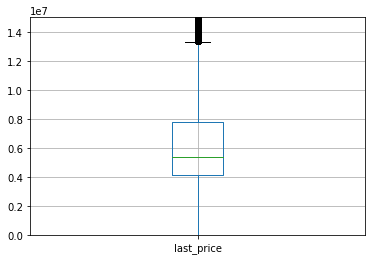

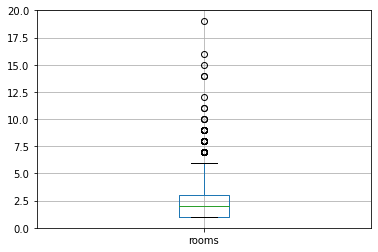

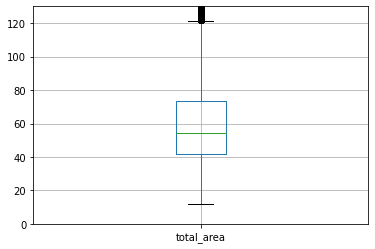

<AxesSubplot:>

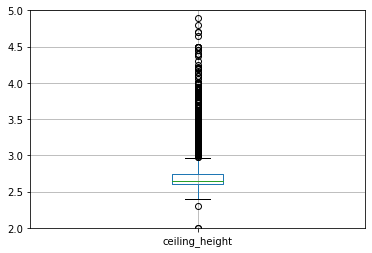

In [46]:
#определю выбросы в колонках с которыми в дальнейшем буду работать

columns2 = ['last_price']
df_price = pd.DataFrame(df, columns=columns2)
plt.ylim(0, 15000000)
df_price.boxplot()

plt.show()

columns3 = ['rooms']
df_rooms = pd.DataFrame(df, columns=columns3)
plt.ylim(0, 20)
df_rooms.boxplot()

plt.show()

columns4 = ['total_area']
df_area = pd.DataFrame(df, columns=columns4)
plt.ylim(0, 130)
df_area.boxplot()

plt.show()

columns5 = ['ceiling_height']
df_height = pd.DataFrame(df, columns=columns5)
plt.ylim(2, 5)
df_height.boxplot()

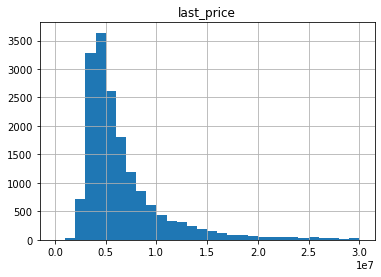

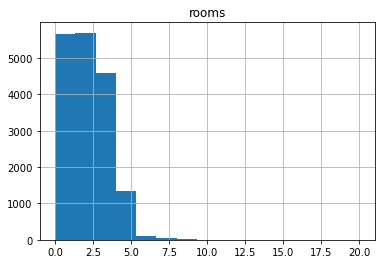

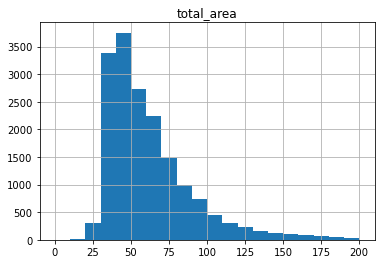

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

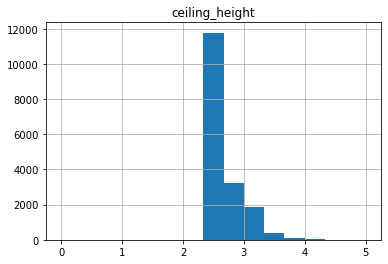

In [47]:
df.hist('last_price', bins=30, range=(0, 30000000))
plt.show()
df.hist('rooms', bins=15, range=(0, 20))
plt.show()
df.hist('total_area', bins=20, range=(0, 200))
plt.show()
df.hist('ceiling_height', bins=15, range=(0, 5))

Выбросами считаем все нулевые значения, потому что эти колонки не могут быть нулевыми, а также длинные хвосты, их мы отсекаем при помощи квартилей.

In [48]:
df_de_notnull = df.query('days_exposition != 0')
df_de_median = df_de_notnull['days_exposition'].median()
df_de_mean = df_de_notnull['days_exposition'].mean()

print()
print('Среднее количество дней:', df_de_mean)
print('Медианное количество дней:', df_de_median)


Среднее количество дней: 183.3936338473705
Медианное количество дней: 96.0


Среднее и медиана отличаются практически в 2 раза, значит с данными что-то не так и на среднее повлияли какие-то некачественные данные

<AxesSubplot:>

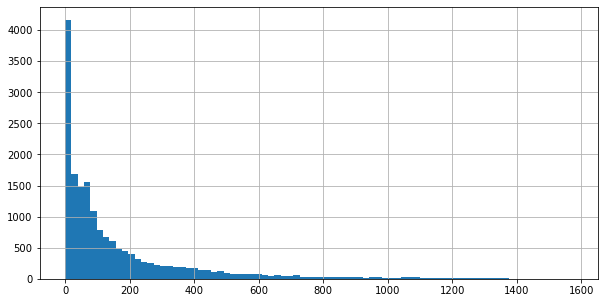

In [49]:
#посмотрим на график этой колонки, чтобы понять в чем дело
df['days_exposition'].hist(bins=80, figsize=(10, 5))

<AxesSubplot:>

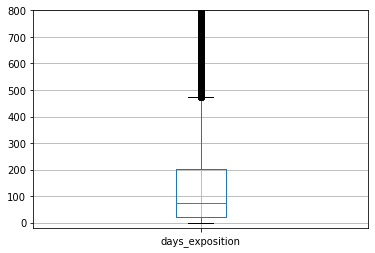

In [50]:
#как и предполагалось, длинный хвост уходящий в 1000+ сместил среднее дальше от оси Y
#посмотрю при помощи квартилей диапазон репрезинтативной выборки

columns7 = ['days_exposition']
df_dexp = pd.DataFrame(df, columns=columns7)
plt.ylim(-20, 800)
df_dexp.boxplot()

In [51]:
df_days_e = df.query('days_exposition < 600')
len(df), len(df_days_e)

(17466, 16540)

<AxesSubplot:>

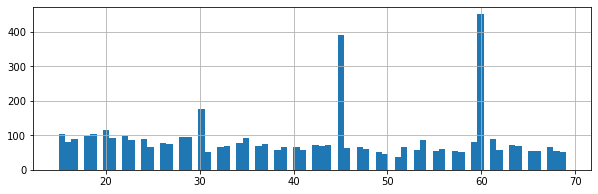

In [52]:
df.query('14 < days_exposition < 70')['days_exposition'].hist(bins=80, figsize=(10, 3))

При подробном рассмотрении я заметил странные всплески количества закрытия объявлений с периодом в 15 дней. Возможно раз в 15 дней людям приходит рассылка, которая уточняет актуально ли их объяевление еще или нет. Если нет, то оно удаляется

In [53]:
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,part_kitchen_area,part_living_area,weekday,category_fl,year,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2.0,755.0,0,120370.370370,0.231481,0.472222,3,другое,2019,3
1,0,64900000.0,159.0,2015-07-24,3,2.65,14,100.461415,9,False,...,3.0,234.0,424,408176.100629,0.129294,0.631833,4,другое,2015,7
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.600000,7,False,...,0.0,504.0,289,88524.590164,0.106557,0.714754,6,другое,2017,2
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.600000,1,False,...,0.0,504.0,397,81707.317073,0.109756,0.678049,3,первый,2017,11
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.000000,8,False,...,0.0,504.0,97,117355.371901,0.099174,0.628099,2,другое,2019,1


<AxesSubplot:xlabel='rooms'>

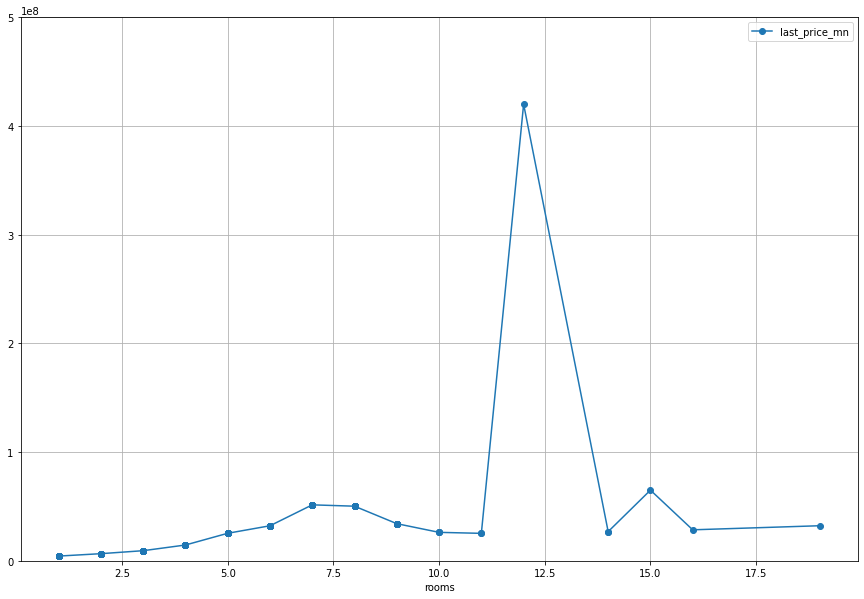

In [54]:
df_price_rooms = df.pivot_table(index='rooms', values='last_price')
df_price_rooms.columns = ['last_price_mn']
df_corr = df.merge(df_price_rooms, on = 'rooms')

df_corr.sort_values(by='rooms', ascending=False).plot(
    x='rooms', y='last_price_mn', style='o-', ylim=(0, 500000000), grid=True, figsize=(15, 10)
)



Изучая зависимость цены от количества комнат, я понял, что есть прямая(положительная) корелляция, т.е. с увеличением комнат растет и цена, но до определенного момента, я думаю для анализа нам можно взять квартиры с адекватным количеством комнат, где корреляция еще прослеживается, т.е. 6-7 комнатные. Также я увидел неожиданный всплеск цены на 12 комнатные квартиры, предполагаю, что это какие-то коммерческие помещения под офисы или хостелы.

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

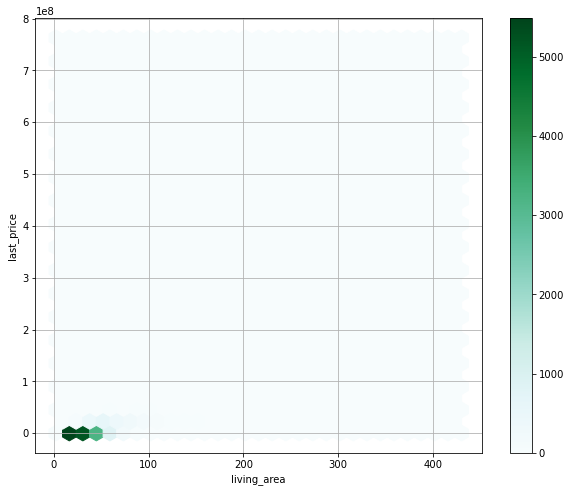

In [55]:
df_corr.plot(x='living_area', y='last_price', kind='hexbin', gridsize=30, figsize=(10, 8), sharex=False, grid=True) 

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

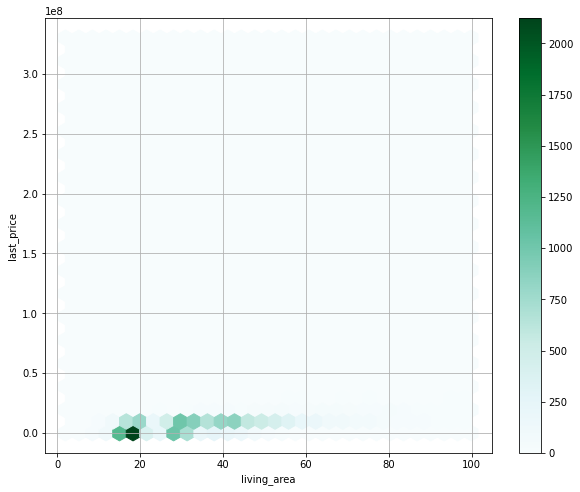

In [56]:
df_corr.query('living_area < 100').plot(
    x='living_area', y='last_price', kind='hexbin', gridsize=30, figsize=(10, 8), sharex=False, grid=True
) 

<AxesSubplot:xlabel='category_fl'>

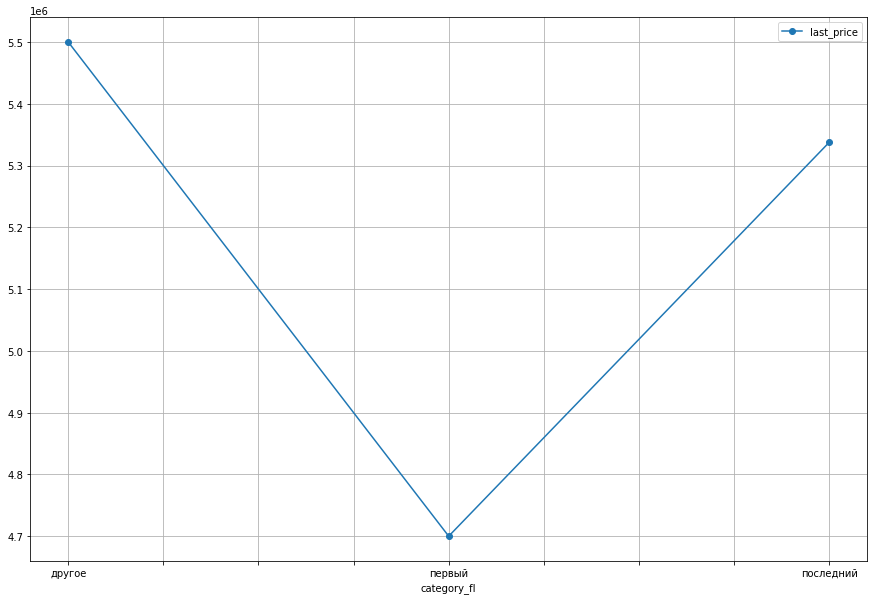

In [57]:
df_corr.pivot_table(index='category_fl', values='last_price', aggfunc='median').plot(
    style='o-',
    grid=True,
    figsize=(15, 10)
)

Ожидаемо, что первый этаж окажется самым дешевым, между всеми остальными и последним этажом не такая большая разница

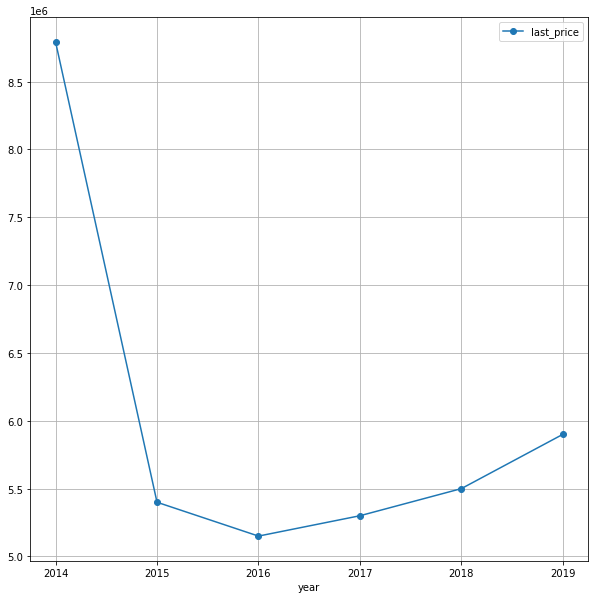

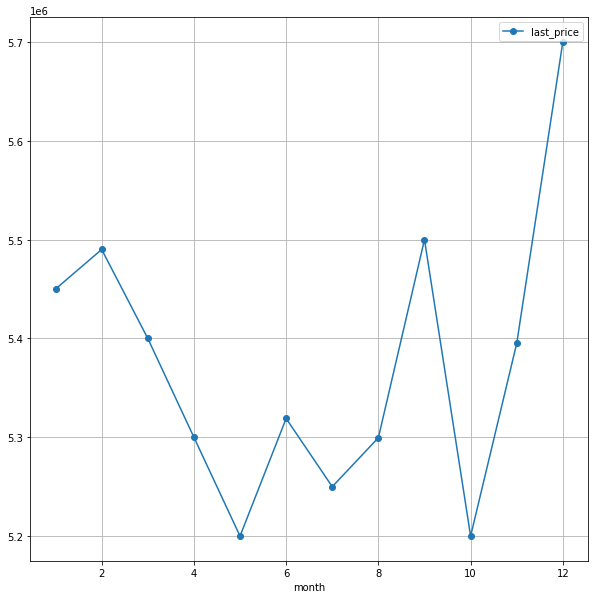

<AxesSubplot:xlabel='weekday'>

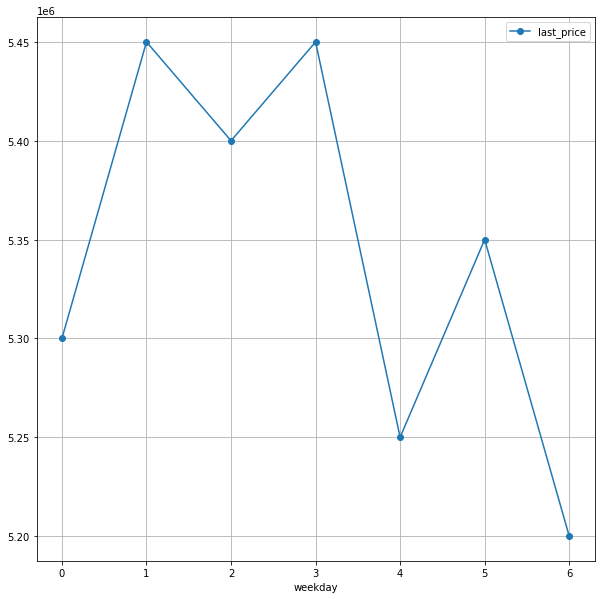

In [58]:
df_corr.query('60 < days_exposition < 600').pivot_table(index='year', values='last_price', aggfunc='median').plot(
    style='o-',
    grid=True,
    figsize=(10, 10)
)

plt.show()

df_corr.query('60 < days_exposition < 600').pivot_table(index='month', values='last_price', aggfunc='median').plot(
    style='o-',
    grid=True,
    figsize=(10, 10)
)

plt.show()

df_corr.query('60 < days_exposition < 600').pivot_table(index='weekday', values='last_price', aggfunc='median').plot(
    style='o-',
    grid=True,
    figsize=(10, 10)
)

Между ценой днем недели и месяцем связи практически нет, а вот с годом интереснее, видно, что есть некоторая корреляция, но я думаю это в первую очередь связано от экономической ситуации в стране в конкретный год, а так же от позиций рубля на мировом рынке

<AxesSubplot:>

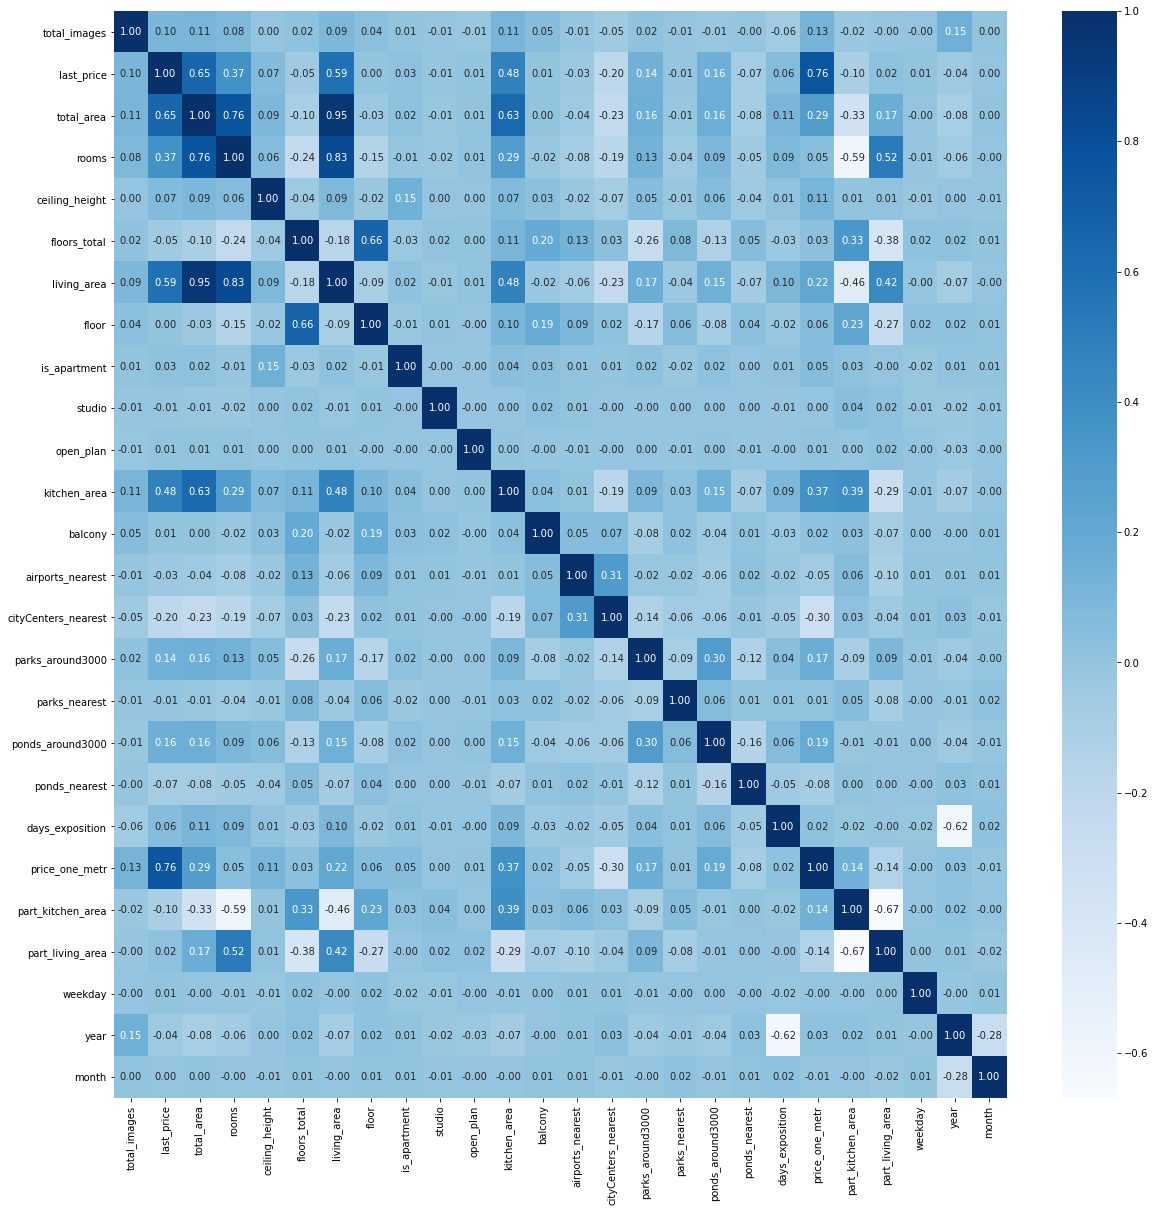

In [59]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="Blues", fmt='.2f')

In [60]:
df_corr3 = df_corr.pivot_table(
    index='locality_name', values=['price_one_metr', 'last_price'], aggfunc=['mean', 'count']
)

df_corr3.columns = ['mean_price', 'mean_price_metr', 'count', 'count2']
df_corr3.sort_values(by='count', ascending=False).head(10)

df_corr4 = df_corr.pivot_table(
    index='locality_name', values=['price_one_metr', 'last_price'], aggfunc=['max', 'min']
)

df_corr4.columns = ['max_price', 'max_price_metr', 'min_price', 'min_price_metr']

df_corr3 = df_corr3.merge(df_corr4, on = 'locality_name')

df_corr3 = df_corr3.sort_values(by='count', ascending=False).head(10)
df_corr3.head(10)

# Топ 10 населённых пунктов с наибольшим числом объявлений. Средняя цена квадратного метра в этих населённых пунктах.

,mean_price,mean_price_metr,count,count2,max_price,max_price_metr,min_price,min_price_metr
locality_name,,,,,,,,
санкт-петербург,8.092132e+06,114807.898691,15542,15542,763000000.0,1.907500e+06,12190.0,111.834862
пушкин,6.469036e+06,103125.819291,369,369,42000000.0,2.565217e+05,1990000.0,59836.065574
колпино,3.964021e+06,75424.579098,338,338,36900000.0,1.250000e+05,2100000.0,47957.371226
посёлок парголово,4.514073e+06,90289.778393,323,323,9140000.0,1.385224e+05,1800000.0,39205.955335
петергоф,4.423841e+06,84757.559690,201,201,22000000.0,2.259717e+05,2100000.0,51612.903226
сестрорецк,6.341722e+06,101757.616875,183,183,21700000.0,1.826882e+05,2800000.0,50434.782609
красное село,3.821852e+06,72278.701830,176,176,21000000.0,1.017143e+05,1799000.0,42500.000000
ломоносов,3.662880e+06,72724.046741,133,133,9150000.0,1.000000e+05,1650000.0,49166.666667
кронштадт,4.132365e+06,79714.443253,96,96,17630000.0,1.114706e+05,2290000.0,46641.791045


In [61]:
#Населённый пункт с самой высокой стоимостью жилья

max = df_corr3['max_price'].max()
df_corr3.query('max_price == @max')

,mean_price,mean_price_metr,count,count2,max_price,max_price_metr,min_price,min_price_metr
locality_name,,,,,,,,
санкт-петербург,8.092132e+06,114807.898691,15542,15542,763000000.0,1907500.0,12190.0,111.834862


In [62]:
#Населённый пункт с самой низкой стоимостью жилья

min = df_corr3['min_price'].min()
df_corr3.query('min_price == @min')

,mean_price,mean_price_metr,count,count2,max_price,max_price_metr,min_price,min_price_metr
locality_name,,,,,,,,
санкт-петербург,8.092132e+06,114807.898691,15542,15542,763000000.0,1907500.0,12190.0,111.834862


In [63]:
cr_max = df_corr3['mean_price'].max()
df_corr3.query('mean_price == @cr_max')

,mean_price,mean_price_metr,count,count2,max_price,max_price_metr,min_price,min_price_metr
locality_name,,,,,,,,
санкт-петербург,8.092132e+06,114807.898691,15542,15542,763000000.0,1907500.0,12190.0,111.834862


In [64]:
cr_min = df_corr3['mean_price'].min()
df_corr3.query('mean_price == @cr_min')

,mean_price,mean_price_metr,count,count2,max_price,max_price_metr,min_price,min_price_metr
locality_name,,,,,,,,
ломоносов,3.662880e+06,72724.046741,133,133,9150000.0,100000.0,1650000.0,49166.666667


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0')])

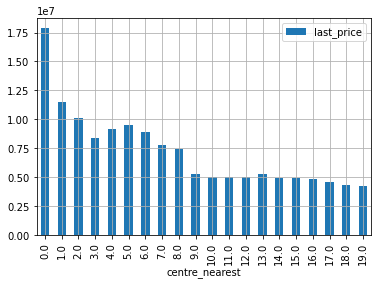

In [65]:
df = df_corr
df['centre_nearest'] = df['cityCenters_nearest'] / 1000
df['centre_nearest'] = df['centre_nearest'].round(0)
#df.head()

df.query('centre_nearest < 20').pivot_table(index='centre_nearest', values='last_price', aggfunc='median').plot.bar(grid=True)
plt.xticks(rotation=90)

Видим, что зависимость есть, только если дом находится прямо в центре (радиус около 3-4 км). Дальше расположение дома не особо влияет на цену, я думаю дальше ориентир который влияет на цену это удаленность от метро. Есть повышение цен в радиусе 4-7 км, возможно это какие-то старые, популярные или элитные районы, где цена выше.

Дальше исследование уже центра Питера в радиусе 4 км

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0')])

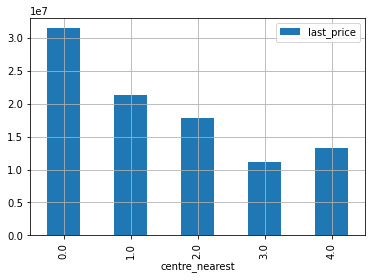

In [66]:
df_spb = df.query('locality_name == "санкт-петербург" & centre_nearest <= 4')
df_spb.pivot_table(index='centre_nearest', values='last_price').plot.bar(grid=True)
plt.xticks(rotation=90)

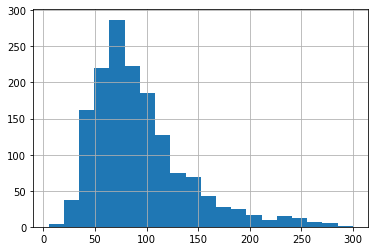

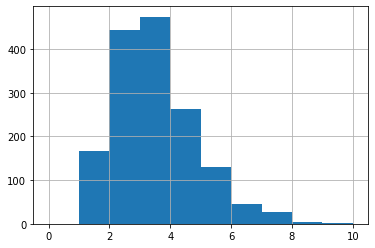

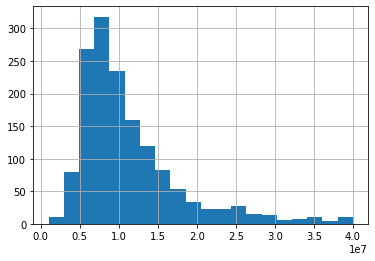

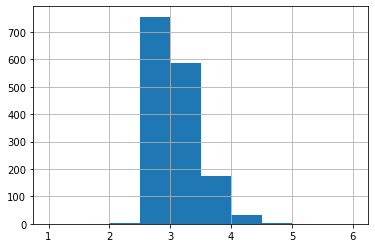

In [67]:
df_spb_center = df.query('locality_name == "санкт-петербург" & centre_nearest <= 4')
#f_spb_center.shape

df_spb_center['total_area'].hist(bins=20, range=(5, 300))

plt.show()

df_spb_center['rooms'].hist(bins=10, range=(0, 10))

plt.show()

df_spb_center['last_price'].hist(bins=20, range=(1000000, 40000000))

plt.show()

df_spb_center['ceiling_height'].hist(bins=10, range=(1, 6))

plt.show()

<AxesSubplot:xlabel='rooms'>

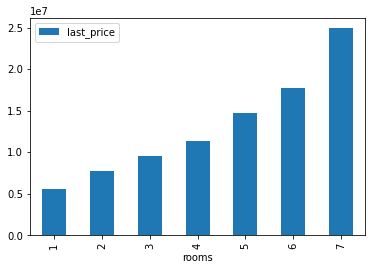

In [68]:
df_spb_center.query('rooms <= 7').pivot_table(index='rooms', values='last_price', aggfunc='median').plot.bar()

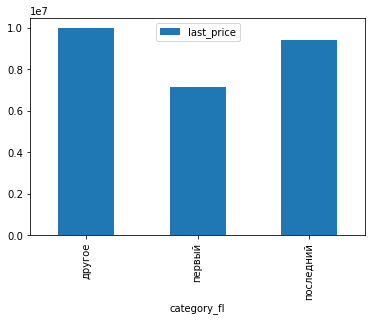

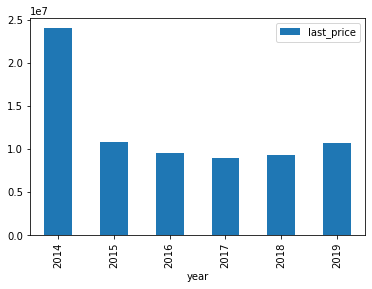

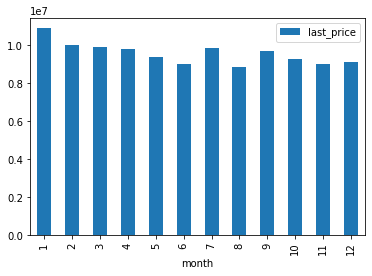

<AxesSubplot:xlabel='weekday'>

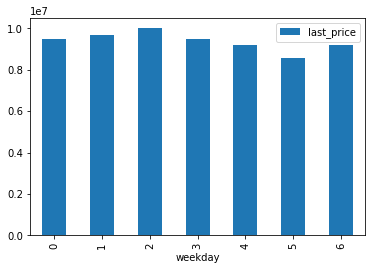

In [69]:
df_spb_center.pivot_table(index='category_fl', values='last_price', aggfunc='median').plot.bar()
plt.show()
df_spb_center.pivot_table(index='year', values='last_price', aggfunc='median').plot.bar()
plt.show()
df_spb_center.pivot_table(index='month', values='last_price', aggfunc='median').plot.bar()
plt.show()
df_spb_center.pivot_table(index='weekday', values='last_price', aggfunc='median').plot.bar()

Если подводить краткий итог по исследованию центра Питера, то можно сказать, что ситуация не отличается от общей картины на рынке, все работает по тем же правилам.

Цены в центре ожидаемо выше рынка, т.е. за одну и ту же площадь в центре мы запдатим больше, также и с колчеством комнат, двушка в Кудрово будет дешевле двушки в центре.

## Общий вывод

Мы выяснили, что и как сильно влияет на цену недвижимости.
1. Сильнее всего на стоимость квартиры влияет стоимость за квадратный метр.
2. Следом идет площадь. Общая и жилая площадь в одинаковой мере влияют на итоговую цену квартиры.
3. Количество комнат также сильно влияет на стоимость квартиры, но только до определенного момента, например, после 7 комнат корреляция начинает уменьшаться.
4. Этаж. Дороже получаются все этажи кроме первого, первый этам самый дешевый.
5. День размещения и месяц не особо влияют на стоимость квартиры, а вот год играет большую роль, но как я уже писал выше, скорее всего дело в экономике в конкретный год, т.е. цены не растут из года в год несмотря на другие переменные, они могут как вырасти, так и упасть в зависимости от того, как себя поведет экономика и рубль на мировом рынке.
6. Удаленность от центра. Тут положительная корреляция которая распространяется на центр города радиусом около 4 км, чем ближе к центру - тем дороже, но также есть какие-то удаленные районы, где цены могут совпадать с ценами в центре.
7. Удаленность или наличие парков не особо влияют на цену, скорее всего они вписываются для повышения спроса, а не цены.
